# Configurações de Experimentação

Este arquivo foi criado por Leonardo Monteiro Neres de Lima

## Descrição da atividade

Executar 100 repetições do algoritmo desenvolvido na Parte 1 para as seguintes configurações η × I = {0,4, 0,1, 0,01} × {(−100, + 100),(−1, + 1),(−0,5, + 0,5)}.


## Inportações

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import perceptron
import math
import random
import os

### Configurações a serem consideradas

In [2]:
# Teta
teta = 0

# vies
vies = -1

# taxa de aprendizado
n = [.4, .1, .01]

# modulo para gerar o intervalo a ser utilizado para a distribuição uniforme do valor dos pesos
intervalo = [100, 1, .5]

### Produto cartesiano para gerar uma lista de Configurações

In [3]:
index = pd.MultiIndex.from_product([n, intervalo], names = ["n", "intervalo"])

config = pd.DataFrame(index = index).reset_index()

### Funções para capturar e imprimir as configurações

In [23]:
# retorna uma lista com os parametros da configuração
def get_conf(n, i):
    return [n, -i, i]
    
# imprime a configuração
def print_conf(n, i_i, i_s):
    print('Taxa de aprendizado: '+ str(n)+'\nIntervalo utilizado para a distribuição uniforme do valor dos pesos: ('+ str(i_i) +', '+ str(i_s) +')')

## Leitura e configuração do Dataset

In [5]:
# leitura do dataset
data = np.fromfile(os.path.join('datasets', 'data2.txt'), dtype=float)
print(data.shape)


# Função para configurar entrada e saída para o treinamento do perceptron
def get_entradas_e_saidas(data):
    i = 0
    entradas = []
    saidas = []
    while(i < len(data)):
        entradas.append([vies, data[i], data[i+1]])
        saidas.append(data[i+2])
        i = i + 3
    return np.array(entradas, dtype=float), np.array(saidas, dtype=int)

entradas, saidas = get_entradas_e_saidas(data)

(1800,)


## Funções Auxiliares

 Para o cumprimento da atividade é necessário uma distribuição uniforme de valores aleatórios para inicialização dos pesos para a execução do treinamento, a exibição de um gráfico para ilustrar as classes do dataset e o aprendizado representado por uma reta, e também a média e desvio padrão de quantidade ajustes e épocas das 100 execuções de treinamento de cada configuração de treinamento.

In [6]:
# geração de um número aleatório dentro de um intervalo
def random_interval(i, s):
    min = i
    max = s
    return min + (random() * (max - min))

# geração de uma lista de pesos segundo uma distribuição uniforme de valores aleatórios dado o intervalo
def get_pesos(i, s):
    # seed(1)
    return np.random.uniform(i, s, entradas.shape[1])


In [7]:
# acumulador de quandidate em lista de lista para lista
def accumulator_to_list(l):
    list_accumulator = []
    for i in l:
        x = 0
        for j in i:
            x = x + j
        list_accumulator.append(x)
    return list_accumulator

# acumulador de quandidate em lista de lista para lista
def accumulator_to_value(l):
    x = 0
    for i in l:
        x = x + i
    return x

# execução de n execuções de treinamento e impressão da média e desvio padrão de quantidade ajustes e épocas
def executions_conf(interval_i, interval_s, n, n_executions, teta):
    v_pesos = []
    v_epocas = []
    v_ajustes = []
    for i in range(n_executions):
        init_pesos = get_pesos(interval_i, interval_s)
        pesos, epocas, ajustes, s = perceptron.treinamento(entradas, saidas, init_pesos, n, teta)
        v_pesos.append(pesos)
        v_epocas.append(epocas)
        v_ajustes.append(ajustes)
    pesos = np.array(v_pesos)
    epocas = np.array(v_epocas)
    ajustes = np.array(accumulator_to_list(v_ajustes))
    
    print(str(n_executions)+' execucoes para a configuracao')
    print('-'*30+'Quantidade de Ajustes de Pesos'+30*'-')
    print('Media: ' + str(np.average(ajustes)))
    print('Desvio Padrao: ' + str(np.std(ajustes)))
    print('-'*35+'Quantidade de Epocas'+35*'-')
    print('Media: ' + str(np.average(epocas)))
    print('Desvio Padrao: ' + str(np.std(epocas)))

    return accumulator_to_value(ajustes), accumulator_to_value(epocas)



In [8]:
# exibição de um gráfico para ilustrar as classes do dataset e o aprendizado representado por uma reta
def gera_grafico(entradas, saidas, interval_i, interval_s, n, teta):
    # declaracao dos vetores para o grafico
    class_1_x = []
    class_1_y = []
    class_2_x = []
    class_2_y = []
    # separacao de classes por cor
    for i in range(len(entradas)):
        if (saidas[i]==1):
            class_1_x.append(entradas[i][1])
            class_1_y.append(entradas[i][2])
        else:
            class_2_x.append(entradas[i][1])
            class_2_y.append(entradas[i][2])

    # treinamento
    init_pesos = get_pesos(interval_i, interval_s)
    pesos, epocas, ajustes, s = perceptron.treinamento(entradas, saidas, init_pesos, n, teta)
    
    # Cálculo dos coeficientes da linha de decisão
    b = pesos[0]/pesos[2]
    a = -1 * (pesos[1]/pesos[2])
    # Criando os pontos da linha de decisão
    x, y = [], []
    
    menor = min(entradas[:,1])
    maior = max(entradas[:,1])

    for i in [menor, maior]:
        x.append(i)
        valor = b + a*(i)
        y.append(valor)

    
    plt.rcParams['figure.figsize']=(11,11)
    plt.scatter(class_1_x, class_1_y, color='red')
    plt.plot(x, y, color="black", markersize=100)
    plt.scatter(class_2_x, class_2_y, color='blue')
    plt.show()

## Função de iteração da lista de configurações 

A chamada da exibição de um gráfico e 100 execuções de treinamento de cada configuração.


______________________________________Configuração 1______________________________________

Taxa de aprendizado: 0.4
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-100.0, 100.0)



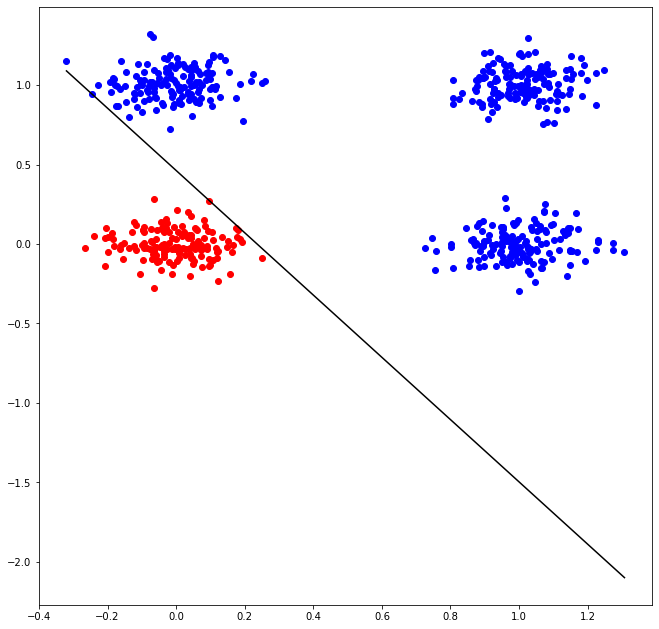


3 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 1075.0
Desvio Padrao: 741.7802909217796
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 17.0
Desvio Padrao: 4.96655480858378


______________________________________Configuração 2______________________________________

Taxa de aprendizado: 0.4
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-1.0, 1.0)



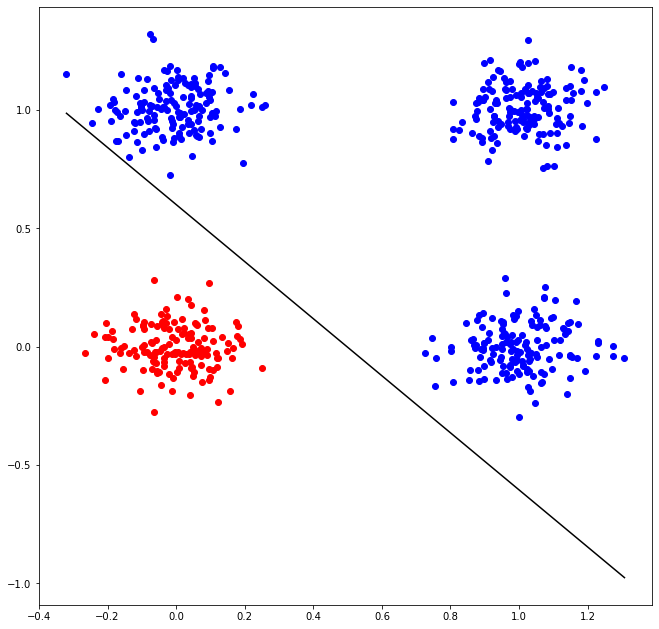


3 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 55.0
Desvio Padrao: 18.547236990991408
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 8.333333333333334
Desvio Padrao: 3.2998316455372216


______________________________________Configuração 3______________________________________

Taxa de aprendizado: 0.4
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-0.5, 0.5)



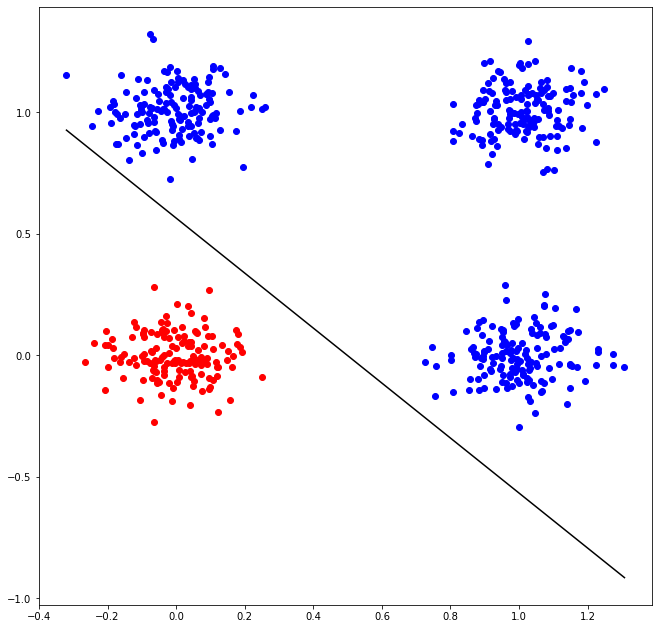


3 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 25.0
Desvio Padrao: 5.0990195135927845
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 6.0
Desvio Padrao: 0.816496580927726


______________________________________Configuração 4______________________________________

Taxa de aprendizado: 0.1
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-100.0, 100.0)



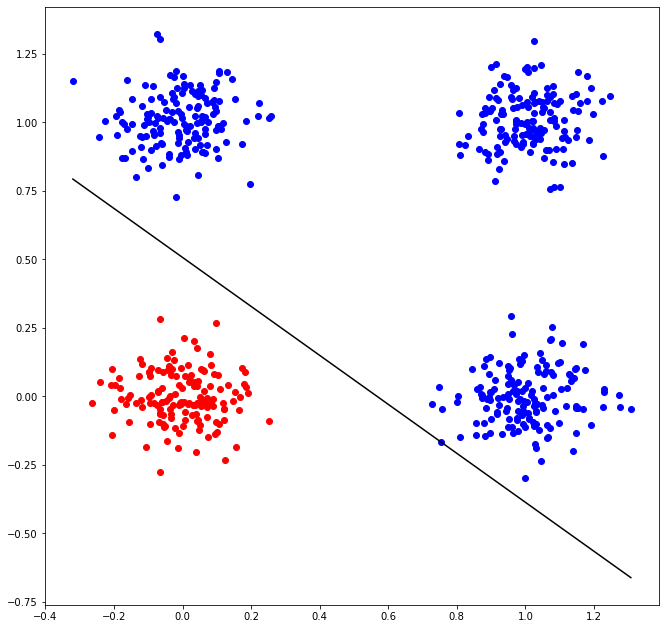


3 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 5623.0
Desvio Padrao: 2259.5163199233593
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 97.33333333333333
Desvio Padrao: 56.6411707349188


______________________________________Configuração 5______________________________________

Taxa de aprendizado: 0.1
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-1.0, 1.0)



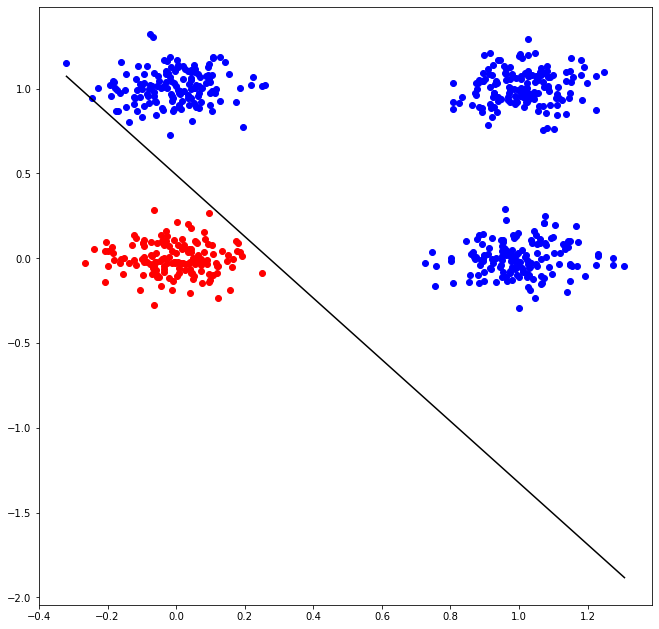


3 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 74.0
Desvio Padrao: 47.391982444291145
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 7.333333333333333
Desvio Padrao: 1.247219128924647


______________________________________Configuração 6______________________________________

Taxa de aprendizado: 0.1
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-0.5, 0.5)



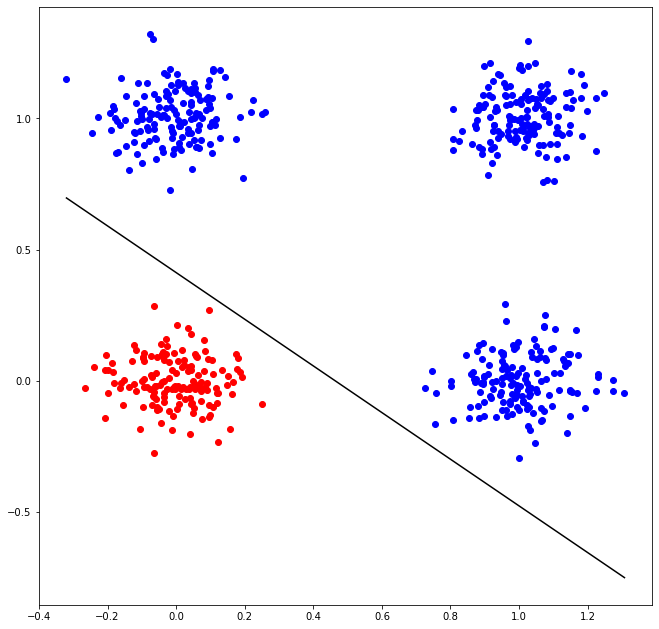


3 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 37.0
Desvio Padrao: 16.30950643030009
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 7.0
Desvio Padrao: 1.632993161855452


______________________________________Configuração 7______________________________________

Taxa de aprendizado: 0.01
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-100.0, 100.0)



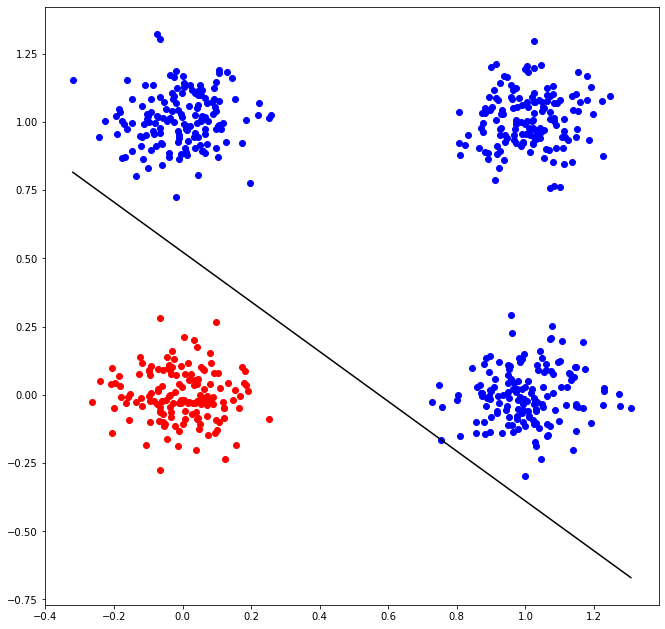


3 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 53691.0
Desvio Padrao: 14883.299634153711
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 1195.6666666666667
Desvio Padrao: 798.1885046083343


______________________________________Configuração 8______________________________________

Taxa de aprendizado: 0.01
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-1.0, 1.0)



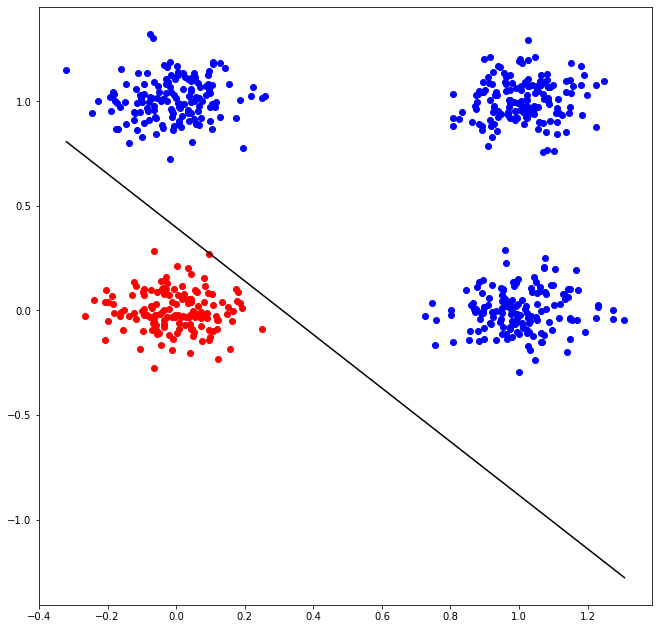


3 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 432.0
Desvio Padrao: 106.7707825203131
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 10.0
Desvio Padrao: 2.160246899469287


______________________________________Configuração 9______________________________________

Taxa de aprendizado: 0.01
Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: (-0.5, 0.5)



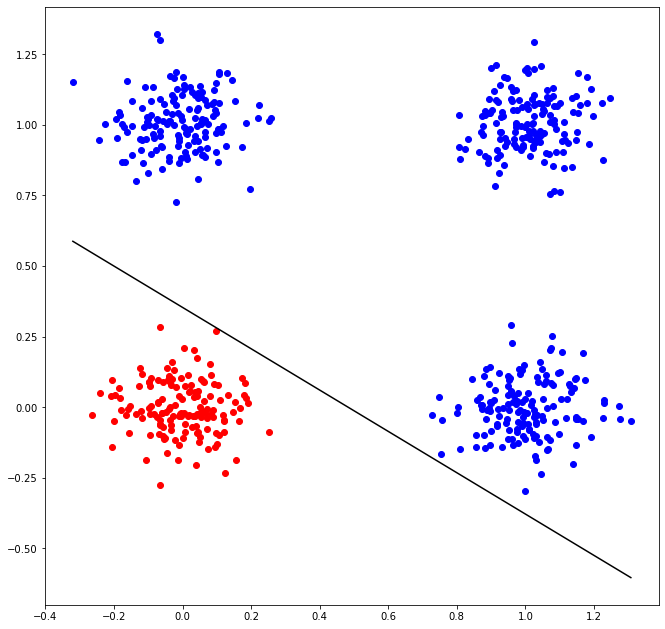


3 execucoes para a configuracao
------------------------------Quantidade de Ajustes de Pesos------------------------------
Media: 390.0
Desvio Padrao: 57.91372894228103
-----------------------------------Quantidade de Epocas-----------------------------------
Media: 11.333333333333334
Desvio Padrao: 2.494438257849294



In [9]:
# itera pela lista capturando e imprimindo o produto cartesiano de configuracoes
conf_result = []
for i in range(len(config['n'])):

    print('\n'+'_'*38+'Configuração ' + str(i+1)+'_'*38+'\n')
    y = get_conf(config['n'][i], config['intervalo'][i])
    print_conf(y[0],y[1],y[2])
    print()

    gera_grafico(entradas, saidas, y[1], y[2], y[0], teta)
    print()

    ajustes, epocas = executions_conf(y[1], y[2], y[0], 100, teta)
    conf_result.append([y[1], y[2], y[0], ajustes, epocas])
    print()


## Análise das configurações 

Para a experimentação é importante analizar os parâmetros resultantes do treinamento baseado na quantidade de execuções en função dos parâmetros das configurações adotadas. 

In [10]:
# funcao para exibir grafico
def chart_line(x, y, x_label, y_label):
    plt.rcParams['figure.figsize']=(11,11)
    plt.plot(x, y, color="black", markersize=100)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# funcao para configurar o grafico de acordo com a configuracao e o resultado do treinamento
def group_by_config(m, y, x, x_label, y_label):
    m_label = np.unique(m[:,y])
    m_result = np.full((1, len(m_label)), 0)[0]
    for i in m:
        index = np.where(m_label == i[y])[0][0]
        m_result[index] = m_result[index] + i[x]
    chart_line(m_label, m_result, x_label, y_label)

conf_result = np.array(conf_result)

### Quantidade total de Ajustes em função do Módulo do intervalo utilizado para a distribuição uniforme do valor aleatórios para os pesos iniciais

Neste gráfico observamos que quanto maior o intervalo dos valores iniciais de pesos maior é a quantidade de ajustes

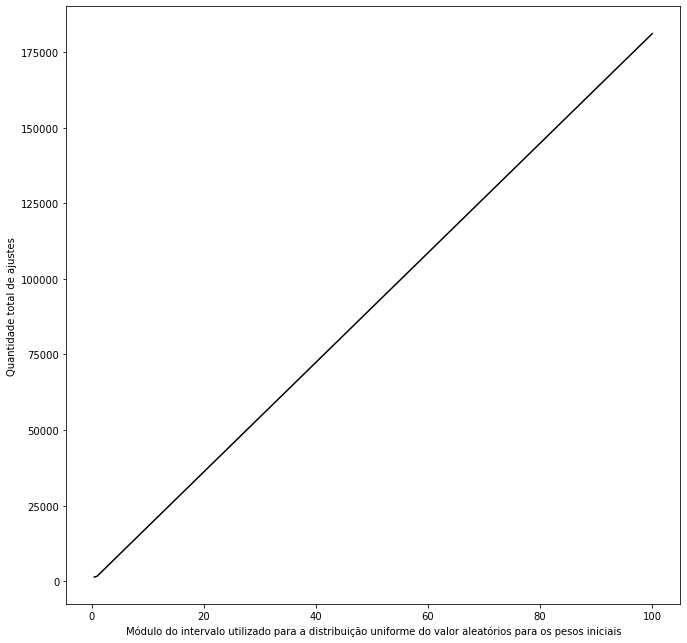

In [11]:
group_by_config(conf_result, 1, 3, 'Módulo do intervalo utilizado para a distribuição uniforme do valor aleatórios para os pesos iniciais', 'Quantidade total de ajustes')

### Quantidade total de Épocas em função da Taxa de aprendizado

Neste gráfico observamos que quanto maior a taxa de aprendizado menor é a quantidade de ajustes

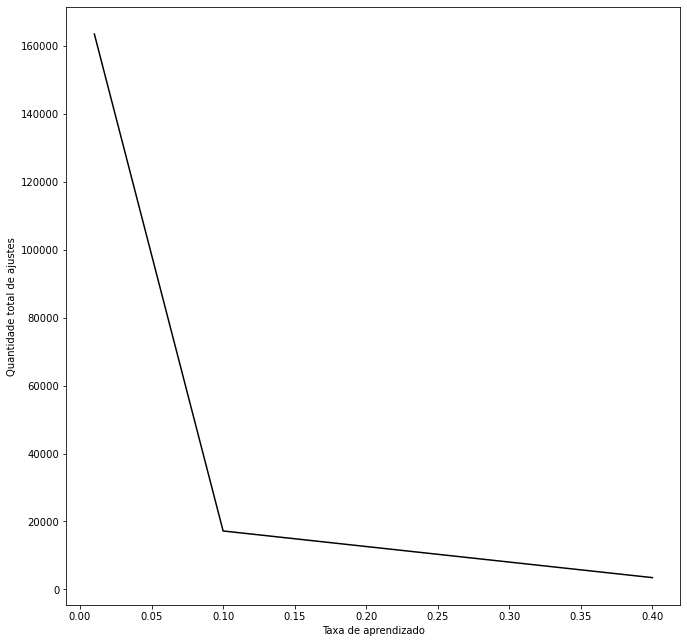

In [12]:
group_by_config(conf_result, 2, 3, 'Taxa de aprendizado', 'Quantidade total de ajustes')

### Quantidade total de Épocas em função do Módulo do intervalo utilizado para a distribuição uniforme do valor aleatórios para os pesos iniciais

Neste gráfico observamos que quanto maior o intervalo dos valores iniciais de pesos maior é a quantidade de épocas

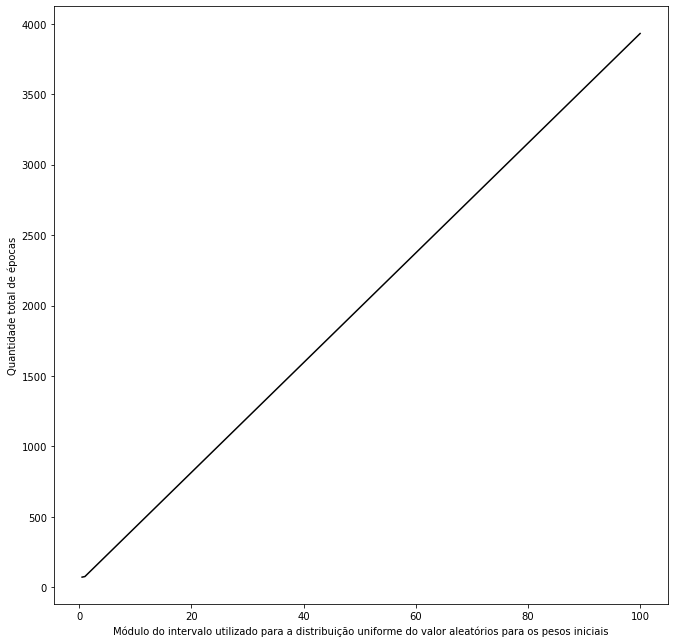

In [13]:
group_by_config(conf_result, 1, 4, 'Módulo do intervalo utilizado para a distribuição uniforme do valor aleatórios para os pesos iniciais', 'Quantidade total de épocas')

### Quantidade total de Épocas em função do Módulo da Taxa de aprendizado

Neste gráfico observamos que quanto maior a taxa de aprendizado menor é a quantidade de épocas

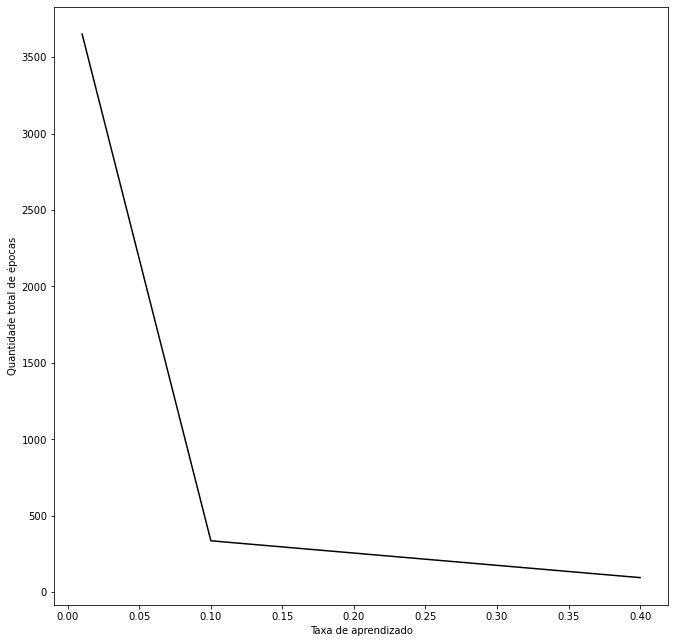

In [14]:
group_by_config(conf_result, 2, 4, 'Taxa de aprendizado', 'Quantidade total de épocas')

Aqui verificamos as configurações que tem menor e maior quantidade de ajustes e épocas

In [24]:
m = np.where(conf_result[:,3] == min(conf_result[:,3]))[0][0]
print("\n- A configuração que teve menor quantidade de ajustes foi: \n")
print_conf(conf_result[m][2], conf_result[m][0], conf_result[m][1])

m = np.where(conf_result[:,3] == max(conf_result[:,3]))[0][0]
print("\n\n- A configuração que teve maior quantidade de ajustes foi: \n")
print_conf(conf_result[m][2], conf_result[m][0], conf_result[m][1])

m = np.where(conf_result[:,4] == min(conf_result[:,4]))[0][0]
print("\n- A configuração que teve menor quantidade de epocas foi: \n")
print_conf(conf_result[m][2], conf_result[m][0], conf_result[m][1])

m = np.where(conf_result[:,4] == max(conf_result[:,4]))[0][0]
print("\n\n- A configuração que teve maior quantidade de epocas foi: \n")
print_conf(conf_result[m][2], conf_result[m][0], conf_result[m][1])


- A configuração que teve menor quantidade de ajustes foi: 

Taxa de aprendizado: 0.4
Intervalo utilizado para a distribuição uniforme do valor dos pesos: (-0.5, 0.5)


- A configuração que teve maior quantidade de ajustes foi: 

Taxa de aprendizado: 0.01
Intervalo utilizado para a distribuição uniforme do valor dos pesos: (-100.0, 100.0)

- A configuração que teve menor quantidade de epocas foi: 

Taxa de aprendizado: 0.4
Intervalo utilizado para a distribuição uniforme do valor dos pesos: (-0.5, 0.5)


- A configuração que teve maior quantidade de epocas foi: 

Taxa de aprendizado: 0.01
Intervalo utilizado para a distribuição uniforme do valor dos pesos: (-100.0, 100.0)
